In [48]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mticker


In [2]:
os.chdir(r"C:\Users\Harshit\Downloads\Machine Learning\Forecasting sticker sales")

In [3]:
df = pd.read_csv(r"train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [5]:
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [6]:
## Drop Duplicates
df = df.drop_duplicates()

# Feature Engineering

## As this is an Sticker Sales Dataset and we don't have much info so we can do feature Engineering on various Paramenters because  these factors significantly influence consumer behavior.
- Holidays - Holidays often lead to higher sales due to special events, discounts, and increased shopping activity.
- Weekends - Weekends typically see different shopping patterns compared to weekdays (e.g., more retail shopping but less business-related purchases).
- Including holidays/weekends as features helps the model capture seasonality and temporal effects.

#### Before that we will split the date column into date, month and year

#### why we do this
- Reduces Complexity for Machine Learning Models
- Dates in YYYY-MM-DD format are strings, which ML models cannot process directly.

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['dates'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [9]:
df.head()

,id,date,country,store,product,num_sold,dates,month,year
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,1,1,2010
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,2010
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,2010
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,2010
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010


#### Holidays

In [10]:
import holidays

In [11]:
# First we will create two columns:
df['is_holiday'] = 0

In [12]:
# we will create objects for holidays
ca_holidays = holidays.country_holidays('CA') #CANADA
fi_holidays = holidays.country_holidays('FI') # FInland
it_holidays = holidays.country_holidays('IT') #Italy
kn_holidays = holidays.country_holidays('KE') #Kenya
nw_holidays = holidays.country_holidays('NO') #Norway
sp_holidays = holidays.country_holidays('SG') #Singapore

In [13]:
def is_holidays(row):
    val_hol = 1
    if row['country'] == 'Canada' and row['date'] in ca_holidays:
        row['is_holiday'] = val_hol
    elif row['country'] == 'Finland' and row['date'] in fi_holidays:
        row['is_holiday'] = val_hol
    elif row['country'] == 'Italy' and row['date'] in it_holidays:
        row['is_holiday'] = val_hol
    elif row['country'] == 'Kenya' and row['date'] in kn_holidays:
        row['is_holiday'] = val_hol
    elif row['country'] == 'Norway' and row['date'] in nw_holidays:
        row['is_holiday'] = val_hol
    elif row['country'] == 'Singapore' and row['date'] in sp_holidays:
        row['is_holiday'] = val_hol
    return row
    
    

In [14]:
df = df.apply(is_holidays,axis=1)

In [15]:
df.head()

,id,date,country,store,product,num_sold,dates,month,year,is_holiday
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,1,1,2010,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,2010,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,2010,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,2010,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010,1


In [16]:
df['is_holiday'].unique()

array([1, 0], dtype=int64)

## Weekends 

In [17]:
df['is_weekend'] = df['date'].apply(lambda x:1 if x.weekday() >= 5 else 0) 

In [18]:
df.head()

,id,date,country,store,product,num_sold,dates,month,year,is_holiday,is_weekend
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,1,1,2010,1,0
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,2010,1,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,2010,1,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,2010,1,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,2010,1,0


## Null values in Targte Variable

In [19]:
df.isna().sum()

id               0
date             0
country          0
store            0
product          0
num_sold      8871
dates            0
month            0
year             0
is_holiday       0
is_weekend       0
dtype: int64

In [20]:
df_null = df[df.isna().any(axis=1)]
df_null

,id,date,country,store,product,num_sold,dates,month,year,is_holiday,is_weekend
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,1,1,2010,1,0
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN,1,1,2010,1,0
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN,2,1,2010,0,1
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN,2,1,2010,0,1
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN,3,1,2010,0,1
...,...,...,...,...,...,...,...,...,...,...,...
229905,229905,2016-12-29,Kenya,Discount Stickers,Holographic Goose,NaN,29,12,2016,0,0
229950,229950,2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN,30,12,2016,0,0
229995,229995,2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN,30,12,2016,0,0
230040,230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NaN,31,12,2016,0,1


In [21]:
perc_null = df_null.shape[0]/df.shape[0]*100
perc_null

3.8547777343240774

## Now we have an dillema over here wheather to fill these Null values by understanding the pattern, drop those null values as the percentage is less than 3% or Fill these values using regression models or kNN imputation to estimate missing target values.
- Here i went with dropping the null values as the perc is less than 3.
- I also tried using regression models or kNN imputation to estimate missing target values but the model had same accuracy
- And i don't have domain knowledge to understand the pattern
- Never impute the target variable using simple techniques (mean, median, etc.) for supervised learning tasks—this corrupts your training data.


In [22]:
## Dropping null values
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221259 entries, 1 to 230129
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          221259 non-null  int64         
 1   date        221259 non-null  datetime64[ns]
 2   country     221259 non-null  object        
 3   store       221259 non-null  object        
 4   product     221259 non-null  object        
 5   num_sold    221259 non-null  float64       
 6   dates       221259 non-null  int64         
 7   month       221259 non-null  int64         
 8   year        221259 non-null  int64         
 9   is_holiday  221259 non-null  int64         
 10  is_weekend  221259 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 20.3+ MB


# EDA (Exploratory Data Analysis)

## Overall Sales Trend Over Time

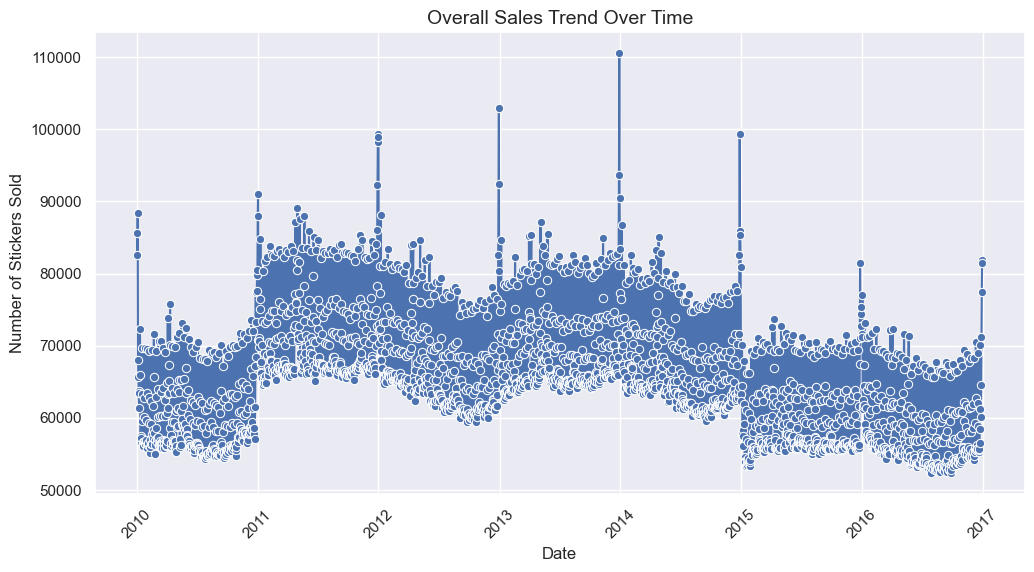

In [55]:
sales_trend = df.groupby("date")["num_sold"].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x="date", y="num_sold", marker="o", color="b")
plt.title("Overall Sales Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Stickers Sold", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Sales Trend By Country (Yearly)

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby(["year", "country"])["num_sold"].sum().reset_index(), 
             x="year", y="num_sold", hue="country", marker="o")
plt.title("Sales Trend by Country", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Stickers Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True)

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis="y")
plt.show()


KeyError: 'country'

<Figure size 1200x600 with 0 Axes>

### Sales Trend by Product (Yearly)

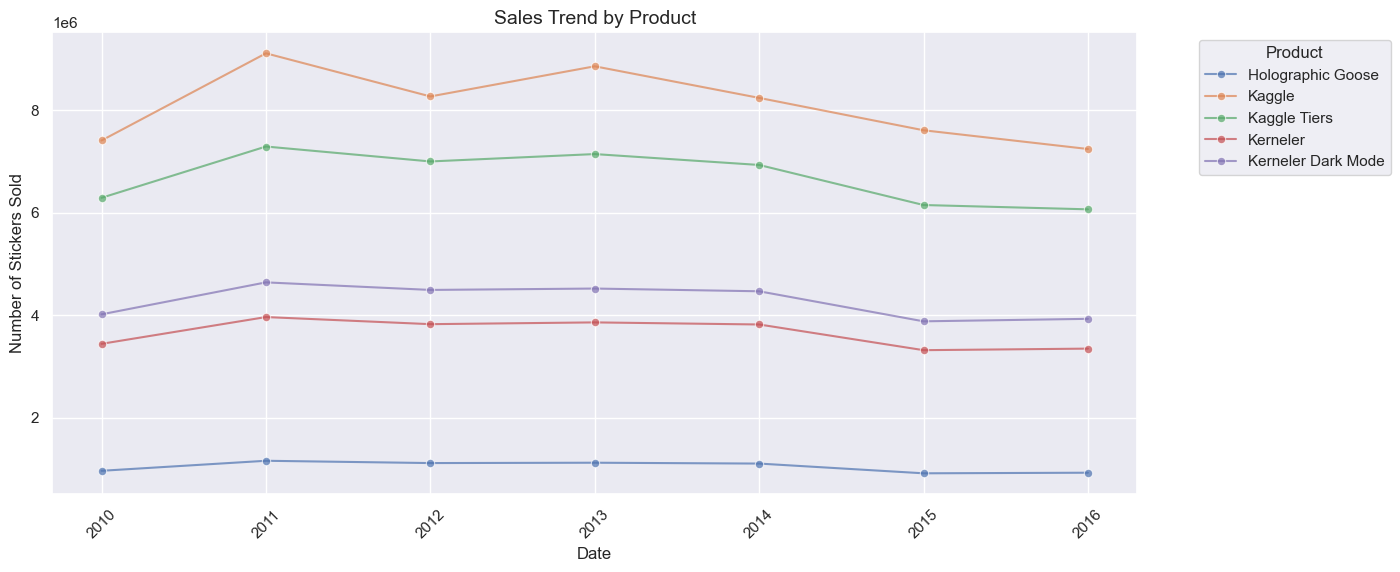

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby(["year", "product"])["num_sold"].sum().reset_index(), 
             x="year", y="num_sold", hue="product", marker="o", alpha=0.7)
plt.title("Sales Trend by Product", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Stickers Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

## Sales Comparison: Weekdays vs. Weekends (Bar Chart)

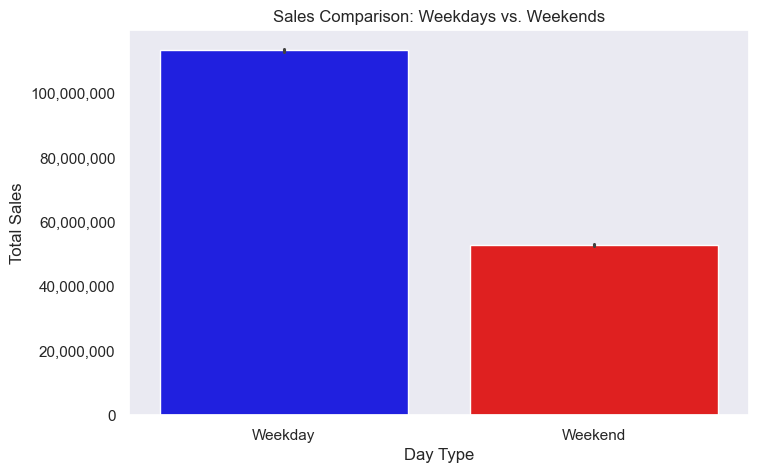

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["is_weekend"], y=df["num_sold"], estimator=sum, palette=["blue", "red"])

plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.xlabel("Day Type")
plt.ylabel("Total Sales")
plt.title("Sales Comparison: Weekdays vs. Weekends")

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis="y")
plt.show()


In [54]:
# We can see on Weekdays sales were Higher.

## Bar Plot for Holiday vs. Non-Holiday Sales

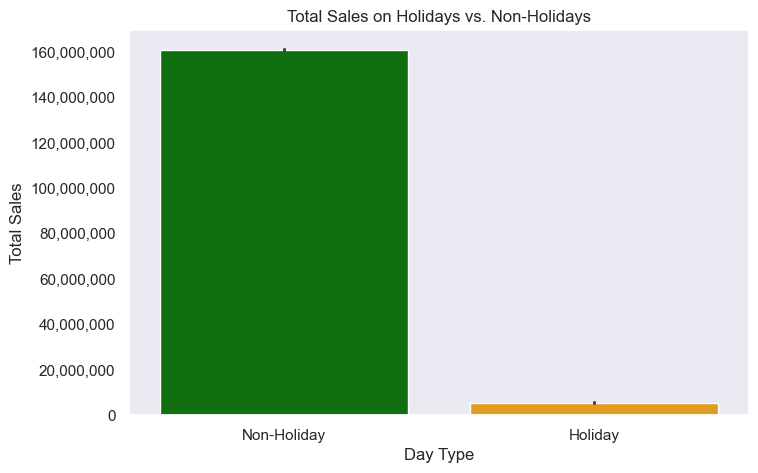

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["is_holiday"], y=df["num_sold"], estimator=sum, palette=["green", "orange"])

plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.xlabel("Day Type")
plt.ylabel("Total Sales")
plt.title("Total Sales on Holidays vs. Non-Holidays")

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis="y")
plt.show()


In [53]:
# We can see that on Holidays the sales were less.

## Monthly Sales Trend (Line Plot by Year)

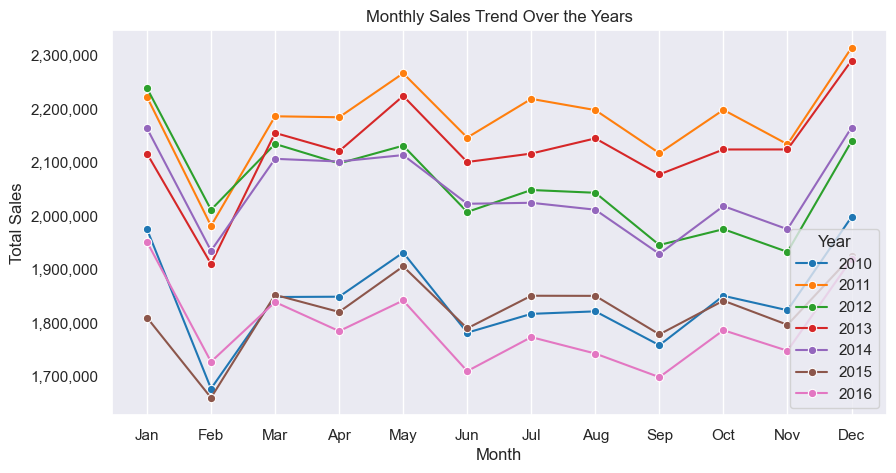

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby(["month", "year"])["num_sold"].sum().reset_index(),
             x="month", y="num_sold", hue="year", marker="o", palette="tab10")

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend Over the Years")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis="y")
plt.show()

## Encoding: For Categorical Columns

In [26]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,country,store,product
1,Canada,Discount Stickers,Kaggle
2,Canada,Discount Stickers,Kaggle Tiers
3,Canada,Discount Stickers,Kerneler
4,Canada,Discount Stickers,Kerneler Dark Mode
5,Canada,Stickers for Less,Holographic Goose


In [27]:
df_encoded = pd.get_dummies(df_cat,dtype=int,drop_first=True)

In [28]:
df = df.drop(columns=df_cat)

In [29]:
df = pd.concat([df,df_encoded],axis=1)

In [30]:
df.head()

,id,date,num_sold,dates,month,year,is_holiday,is_weekend,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,2010-01-01,973.0,1,1,2010,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2010-01-01,906.0,1,1,2010,1,0,0,0,0,0,0,0,0,0,1,0,0
3,3,2010-01-01,423.0,1,1,2010,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,2010-01-01,491.0,1,1,2010,1,0,0,0,0,0,0,0,0,0,0,0,1
5,5,2010-01-01,300.0,1,1,2010,1,0,0,0,0,0,0,0,1,0,0,0,0


# Model Building

In [31]:
# Splitting
x = df.drop(columns=['id','num_sold',"date"])
y = df['num_sold']

In [32]:
### Before Train Test Split let's see the Skewness of our Target Variable

<Axes: xlabel='num_sold', ylabel='Count'>

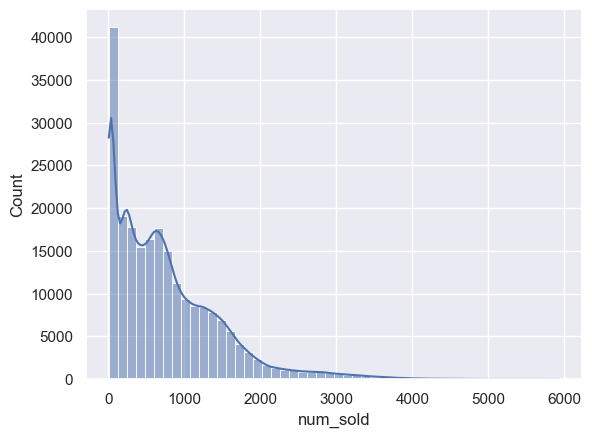

In [33]:
sns.histplot(y,bins=50,kde = True,alpha=0.5)

#### As we can see it's an Right skewed Distribution so we will do:

In [34]:
y = np.log(y)

<Axes: xlabel='num_sold', ylabel='Count'>

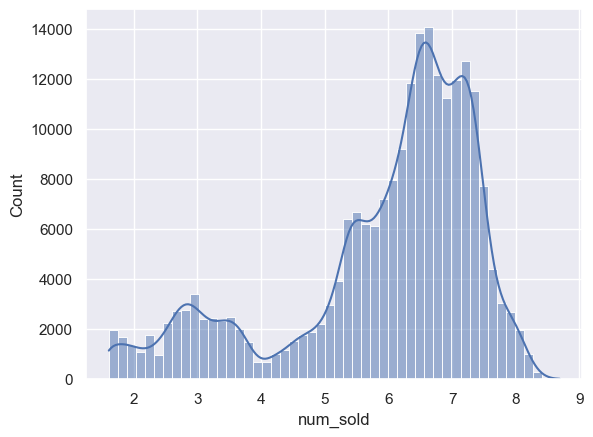

In [35]:
## Now let's see out new distribution
sns.histplot(y,bins=50,kde = True,alpha=0.5)

In [36]:
## We didn't gen an Perfect Gaussian Curve but still we have an much better curve

### Why do we use this?
- To Make Skewed Data More Normal (Gaussian)
- Machine learning models perform better when data is normally distributed.
- Log transformation reduces skewness, making the distribution closer to normal.
- And many more benfits

In [37]:
# Train test split
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=41)

In [39]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import (
    LinearRegression,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error


In [40]:
# Function for models
def eval_model(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    return {'R square score':r2, "MAPE":MAPE,"MSE":MSE}

In [41]:
# CatBoost
results = {}
cat_boost = CatBoostRegressor(learning_rate = 0.1, l2_leaf_reg= 1, iterations= 200, depth= 10, border_count= 32, bagging_temperature= 1)
results["Catboost"] = eval_model(cat_boost)

0:	learn: 1.3899217	total: 170ms	remaining: 33.9s
1:	learn: 1.2541301	total: 192ms	remaining: 19s
2:	learn: 1.1313657	total: 211ms	remaining: 13.9s
3:	learn: 1.0222774	total: 227ms	remaining: 11.1s
4:	learn: 0.9232696	total: 244ms	remaining: 9.53s
5:	learn: 0.8339004	total: 262ms	remaining: 8.47s
6:	learn: 0.7538913	total: 281ms	remaining: 7.74s
7:	learn: 0.6820103	total: 299ms	remaining: 7.16s
8:	learn: 0.6176462	total: 319ms	remaining: 6.78s
9:	learn: 0.5597791	total: 338ms	remaining: 6.43s
10:	learn: 0.5080863	total: 356ms	remaining: 6.12s
11:	learn: 0.4616874	total: 375ms	remaining: 5.87s
12:	learn: 0.4203215	total: 393ms	remaining: 5.66s
13:	learn: 0.3836201	total: 413ms	remaining: 5.48s
14:	learn: 0.3504072	total: 432ms	remaining: 5.33s
15:	learn: 0.3210075	total: 451ms	remaining: 5.18s
16:	learn: 0.2954606	total: 470ms	remaining: 5.05s
17:	learn: 0.2721366	total: 489ms	remaining: 4.94s
18:	learn: 0.2513116	total: 508ms	remaining: 4.84s
19:	learn: 0.2328454	total: 531ms	remaining

In [42]:
# LGBM
lgb = LGBMRegressor()
results['LGBM'] = eval_model(lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 154881, number of used features: 16
[LightGBM] [Info] Start training from score 5.926030


In [43]:
# Xtreme-GB
Xgb = XGBRegressor()
results["XBG"] = eval_model(Xgb)

In [44]:
lin_reg = LinearRegression()
results["Linear Regression"] = eval_model(lin_reg)

#decison tree
dt = DecisionTreeRegressor()
results["Decision Tree"] = eval_model(dt)

#Random Forest
rf = RandomForestRegressor()
results["Random Forest"] = eval_model(rf)

#Bagging
bg = BaggingRegressor()
results["Bagging"] = eval_model(bg)

#Gradient Boostong
gb = GradientBoostingRegressor()
results["Gradient Boosting"] = eval_model(gb)

## Results:

In [45]:
results_df = pd.DataFrame(results).T
results_df

,R square score,MAPE,MSE
Catboost,0.998263,0.009890,0.004117
LGBM,0.997586,0.011773,0.005720
XBG,0.998188,0.010115,0.004293
Linear Regression,0.989115,0.025737,0.025793
Decision Tree,0.995772,0.014767,0.010018
Random Forest,0.997326,0.012027,0.006337
Bagging,0.997170,0.012349,0.006707
Gradient Boosting,0.989932,0.024607,0.023858


## Best Model: Catboost (Based on Evaluation Parameters)

## Mean Squared Error (MSE):
- It calculates the average squared difference between actual (y) and predicted (ŷ) values.

## R² Score (Coefficient of Determination):
- Measures how well the model explains variance in the data.

## Mean Absolute Percentage Error (MAPE):
- Measures the percentage error between actual and predicted values.

## Now we can Deploy our Model if we want to and calculate num of units sold

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby(["dates", "country"])["num_sold"].sum().reset_index(), 
             x="dates", y="num_sold", hue="country", marker="o")
plt.title("Sales Trend by Country", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Stickers Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True)
plt.show()


KeyError: 'country'

<Figure size 1200x600 with 0 Axes>